<a href="https://colab.research.google.com/github/ovejaing/churn_telecomx_colab.ipynb/blob/main/churn_telecomx_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importaciones

In [ ]:
# Si necesitas instalar alguna librería adicional (ejemplo: seaborn ya viene preinstalado en Colab)
# !pip install seaborn

import pandas as pd
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de gráficos
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/TelecomX_Data.json'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#📌 Extracción

In [ ]:

import json


with open(ruta, 'r', encoding='utf-8') as f:
    datos = json.load(f)


import pandas as pd
df = pd.json_normalize(datos)


df.head()



,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:

df.rename(columns={
    'Churn': 'churn',
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'senior_citizen',
    'customer.Partner': 'partner',
    'customer.Dependents': 'dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'phone_service',
    'phone.MultipleLines': 'multiple_lines',
    'internet.InternetService': 'internet_service',
    'internet.OnlineSecurity': 'online_security',
    'internet.OnlineBackup': 'online_backup',
    'internet.DeviceProtection': 'device_protection',
    'internet.TechSupport': 'tech_support',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_movies',
    'account.Contract': 'contract_type',
    'account.PaperlessBilling': 'paperless_billing',
    'account.PaymentMethod': 'payment_method',
    'account.Charges.Monthly': 'monthly_charges',
    'account.Charges.Total': 'total_charges'
}, inplace=True)


df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})


df['monthly_charges'] = pd.to_numeric(df['monthly_charges'], errors='coerce')
df['total_charges']   = pd.to_numeric(df['total_charges'], errors='coerce')


df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').astype('Int64')



df['total_charges'] = df['total_charges'].fillna(0)
print("Filas con churn nulo:", df['churn'].isna().sum())
df = df[df['churn'].notna()]

df.info()
df.head()


Filas con churn nulo: 7043
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         0 non-null      object 
 1   churn              0 non-null      float64
 2   gender             0 non-null      object 
 3   senior_citizen     0 non-null      int64  
 4   partner            0 non-null      object 
 5   dependents         0 non-null      object 
 6   tenure             0 non-null      Int64  
 7   phone_service      0 non-null      object 
 8   multiple_lines     0 non-null      object 
 9   internet_service   0 non-null      object 
 10  online_security    0 non-null      object 
 11  online_backup      0 non-null      object 
 12  device_protection  0 non-null      object 
 13  tech_support       0 non-null      object 
 14  streaming_tv       0 non-null      object 
 15  streaming_movies   0 non-null      object 
 16  contract_type   

,customerID,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges


#📊 Carga y análisis

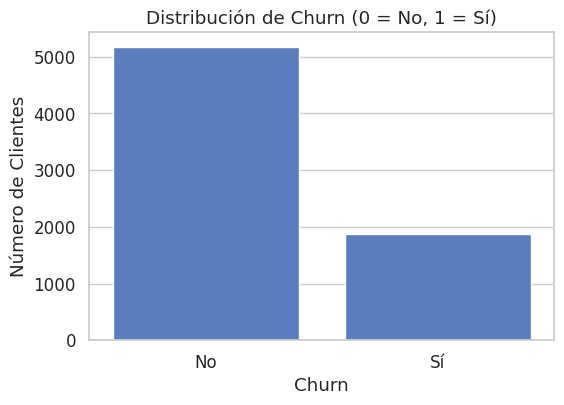

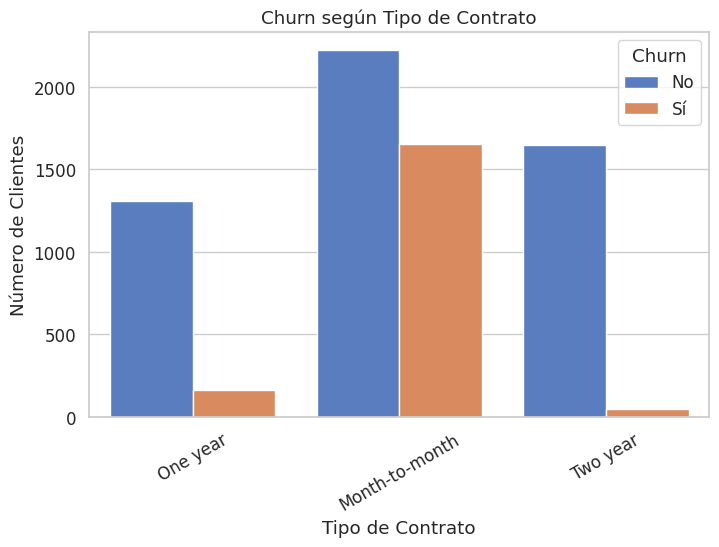

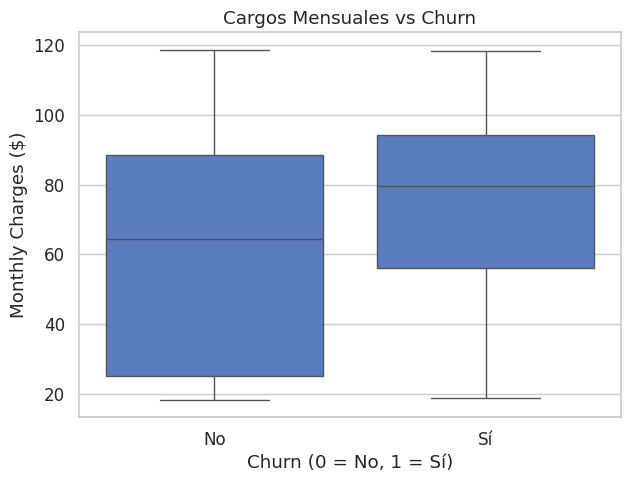

In [ ]:
# ----- Distribución global de churn -----
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title('Distribución de Churn (0 = No, 1 = Sí)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()
# ----- Churn vs. contrato (contract_type) -----
plt.figure(figsize=(8,5))
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title('Churn según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30)
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()
# ----- Boxplot de monthly_charges vs churn -----
plt.figure(figsize=(7,5))
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.title('Cargos Mensuales vs Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()
# ----- KDE de tenure según churn -----
plt.figure(figsize=(7,5))
sns.kdeplot(df[df['churn']==0]['tenure'], label='No churn', shade=True)
sns.kdeplot(df[df['churn']==1]['tenure'], label='Churn', shade=True)
plt.title('Distribución de Tenure según Churn')
plt.xlabel('Tenure (meses)')
plt.legend()
plt.show()
# ----- Matriz de correlación (variables numéricas) -----
num_cols = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'churn']
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones (Numéricas)')
plt.show()
# ----- Churn vs tipo de internet -----
plt.figure(figsize=(7,5))
sns.countplot(x='internet_service', hue='churn', data=df)
plt.title('Churn según Tipo de Servicio de Internet')
plt.xlabel('Internet Service')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()
# ----- Churn vs payment_method -----
plt.figure(figsize=(8,5))
sns.countplot(x='payment_method', hue='churn', data=df)
plt.title('Churn según Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30)
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


#📄Informe final

In [ ]:
df.to_csv('/content/TelecomX_Cleaned.csv', index=False)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


variables = [
  'tenure',
  'monthly_charges',
  'contract_type',
  'payment_method',
  'internet_service'
]
df_model = pd.get_dummies(df[variables + ['churn']], drop_first=True)

X = df_model.drop('churn', axis=1)
y = df_model['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1552
         1.0       0.56      0.48      0.52       561

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.76      2113

Matriz de Confusión:
 [[1345  207]
 [ 294  267]]
